# Segmenting and Clustering Neighbourhoods in Toronto

The following involves exploring, segmenting and clusterin the neighborhoods in the city of Toronto.

Firstly, I would be scraping a wikipedia page in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

In [26]:
!pip install beautifulsoup4

In [27]:
!pip install lxml

In [2]:
import pandas as pd
import requests
import numpy as np

url_html='https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050'

df = pd.read_html(url_html)

df_postcodes=df[0]

print("imported dataframe has",df_postcodes['Postcode'].count(), "postcodes entries")

df_postcodes.head(5)

imported dataframe has 287 postcodes entries


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [3]:
df_postcodes.rename(columns={"Neighbourhood": "Neighborhood"}, inplace= True)
df_postcodes.head(10)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


## Data Preprocessing and cleaning

In [4]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df_postcodes[df_postcodes.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2["Neighborhood"] = np.where(df2["Neighborhood"] == 'Not assigned',df2['Borough'], df2["Neighborhood"])

df2

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [5]:
df2.shape

(103, 3)

## Importing the file that contains the longitude and latitude of different neighborhoods in Toronto

In [6]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [8]:
lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df2,lat_lon,on='Postcode')
df3.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


## The notebook from here entails the exploring of the neighborhoods in Toronto and furthermore the plotting of the neighbourhoods of Canada which contain 'York' in their Borough

### Firstly, i'd be getting all the rows from the data frame which contain 'York' in their Borough name.

In [10]:
df4 = df3[df3['Borough'].str.contains('York',regex=False)]
df4

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
10,M6B,North York,Glencairn,43.709577,-79.445073
13,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923
14,M4C,East York,Woodbine Heights,43.695344,-79.318389
16,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('Folium Installed!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

#### A map is created using folium and the blue markers represent each neighborhood that has "york" in their name.

In [12]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighborhood in zip(df4['Latitude'],df4['Longitude'],df4['Borough'],df4['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

## The map might not be visible on Github. Check out the README for the map.

# CLUSTERING

### Using KMeans clustering for the clsutering of the neighbourhoods

In [13]:
#Importing the library that allows me use the Kmeans algorithm
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np #library to handle data in a vectorized manner

#### Foursquare credentials

In [14]:
CLIENT_ID = 'EJMJNOFHA54VFQ15ZNKBOCGMCAMJ422ETO2AEX3T5DASYZFE' 
CLIENT_SECRET = '2TM4W45FHGBJGX0U5NSIQTD44ANK3INJJ1LFHKMGJM0SUIFO' 
VERSION = '20180605'

#### The following is a function to get all the nearby venues

In [15]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
df = df3[df3['Borough'].str.contains("York")]
df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937


#### Getting all the nearby venues for all the locations in the data frame

In [17]:
toronto_venues = getNearbyVenues(names=df3["Neighborhood"],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )
toronto_venues.head(10)

Parkwoods
Victoria Village
Harbourfront
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The Danforth West,

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
6,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
7,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
8,Harbourfront,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
9,Harbourfront,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop


In [18]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",9,9,9,9,9,9
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Downsview North, Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,56,56,56,56,56,56


In [19]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 267 uniques categories.


There are 270 unique categories of which Italian restaurants is one of them. Next we will be doing one-hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods.

In [20]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.01
1,Agincourt,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Bayview Village,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Berczy Park,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [21]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop              188
Café                      98
Restaurant                75
Park                      54
Pizza Place               54
Italian Restaurant        47
Bakery                    44
Japanese Restaurant       41
Bar                       41
Sandwich Place            37
Hotel                     36
Clothing Store            34
Gym                       33
American Restaurant       29
Thai Restaurant           27
Fast Food Restaurant      27
Bank                      25
Pub                       24
Grocery Store             24
Gastropub                 24
Breakfast Spot            24
Seafood Restaurant        23
Sushi Restaurant          23
Diner                     21
Beer Bar                  20
Pharmacy                  20
Bookstore                 19
Cosmetics Shop            19
Chinese Restaurant        18
Burger Joint              18
                        ... 
Beach                      1
Belgian Restaurant         1
Auto Garage                1
Dim Sum Restau

#### Most common venues in each neighborhood

In [22]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
toronto_onehot.insert(loc=0, column='Neighborhood', value=toronto_venues['Neighborhood'] )

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Restaurant,Coffee Shop,Café,Thai Restaurant,Bakery,Bar,Cosmetics Shop,Lounge,Concert Hall,Clothing Store
1,Agincourt,Latin American Restaurant,Breakfast Spot,Lounge,Clothing Store,Empanada Restaurant,Electronics Store,Ethiopian Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Dumpling Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Liquor Store,Fast Food Restaurant,Beer Store,Sandwich Place,Dog Run,Diner
4,"Alderwood, Long Branch",Pizza Place,Gym,Athletics & Sports,Pharmacy,Pub,Sandwich Place,Skating Rink,Coffee Shop,Airport Terminal,Department Store


#### K-means clustering

In [23]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 4, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0], dtype=int32)

In [24]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Restaurant,Coffee Shop,Café,Thai Restaurant,Bakery,Bar,Cosmetics Shop,Lounge,Concert Hall,Clothing Store
1,Agincourt,Latin American Restaurant,Breakfast Spot,Lounge,Clothing Store,Empanada Restaurant,Electronics Store,Ethiopian Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Dumpling Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Liquor Store,Fast Food Restaurant,Beer Store,Sandwich Place,Dog Run,Diner
4,"Alderwood, Long Branch",Pizza Place,Gym,Athletics & Sports,Pharmacy,Pub,Sandwich Place,Skating Rink,Coffee Shop,Airport Terminal,Department Store


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",9,9,9,9,9,9
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Downsview North, Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,56,56,56,56,56,56


#### EXPLORATORY ANALYSIS

#### Folium is a python library, I'm using it to draw an interactive leaflet map using coordinate data.

In [26]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

##### Relationship between neigborhoods and restaurants

In [27]:
toronto_part = toronto_grouped[['Neighborhood', 'Italian Restaurant']]
toronto_part

,Neighborhood,Italian Restaurant
0,"Adelaide, King, Richmond",0.000000
1,Agincourt,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000
4,"Alderwood, Long Branch",0.000000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000
6,Bayview Village,0.000000
7,"Bedford Park, Lawrence Manor East",0.086957
8,Berczy Park,0.000000
9,"Birch Cliff, Cliffside West",0.000000


In [28]:
toronto_merged = pd.merge(df3, toronto_part, on='Neighborhood')
toronto_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Italian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.000000
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0.000000
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,0.000000
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0.030303
5,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0.000000
6,M3B,North York,Don Mills North,43.745906,-79.352188,0.000000
7,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,0.000000
8,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0.020000
9,M6B,North York,Glencairn,43.709577,-79.445073,0.000000


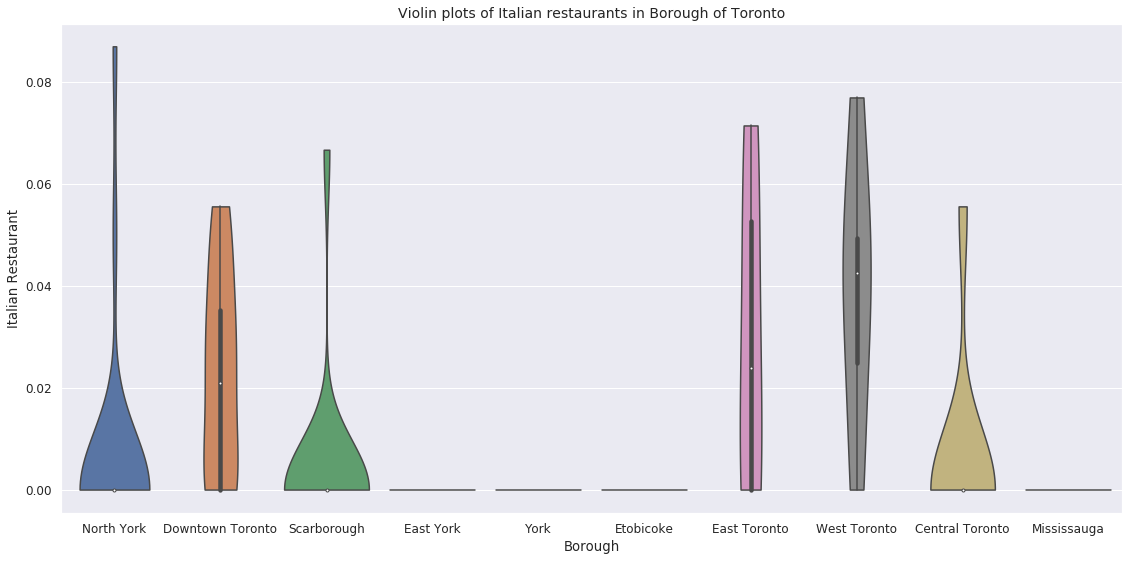

In [29]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Italian Restaurant", x="Borough", data=toronto_merged, cut=0);

plt.title('Violin plots of Italian restaurants in Borough of Toronto', fontsize=14)
plt.show()


This plot helps in identifying the boroughs with densely populated Indian restaurants.

#### Now lets visualize the neighorhoods with Italian Restaurants

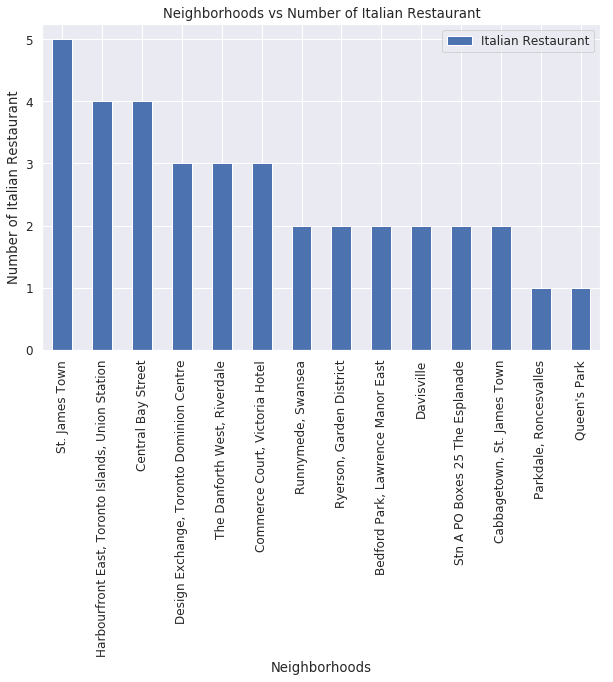

In [30]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Italian Restaurant'].sum())
graph = graph.sort_values(by ='Italian Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Italian Restaurant")
plt.title("Neighborhoods vs Number of Italian Restaurant")
plt.show()

### Predictive Modeling

Here we would be clusterig the neigborhoods of Toronto: First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Italian restaurant percentage (i.e. toronto_merged dataframe).

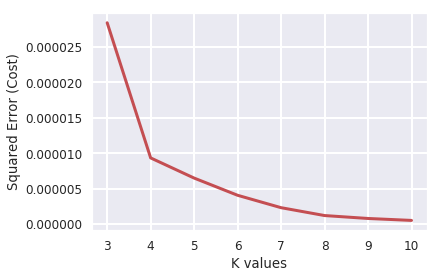

In [31]:
from sklearn.cluster import KMeans

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [32]:
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    certifi-2019.11.28         |           py36_1         157 KB
    ------------------------------------------------------------
                                           Total:         446 KB

The following NEW packages will be INSTALLED:

    pytest-runner:   5.2-py_0                                  
    yellowbrick:     1.1-py36_0                districtdatalabs

The following packages will be UPDATED:

    ca-certificates: 2019.11.28-hecc5488_0     conda-forge      --> 2020.1.1-0       
    certifi:         2019.11.28-py36h9f0ad1d_1 conda-forge      --

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


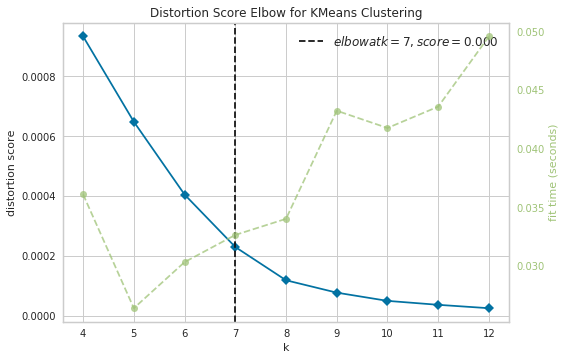

In [33]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_part_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 7 is the best k value.

#### Clustering the Toronto Neighborhood Using K-Means with K =7

In [34]:
kclusters = 7

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 0, 1, 0,
       2, 1, 5, 1, 4, 0, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 4, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 0, 2, 1, 0, 2, 4, 1, 1, 0, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df3
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,0.000000
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,1.0,0.000000
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1.0,0.000000
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,4.0,0.030303


Noe let us see the clusters visually on the map with the help of Folium.

In [36]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Examining the clusters

We have a total of 7 clusters 0,1,2,3,4,5,6. We would examine each 1 at a time.

Cluster 0 contains all the neighborhoods which has least number of Italian restaurants. It is shown in red color in the map

In [37]:
#cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
11,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,0.0,0.050000
13,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,0.050000
22,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.0,0.051948
23,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0,0.055556
44,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0.0,0.052632
75,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.0,0.055556
77,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,0.0,0.051282


Cluster 1 contains all the neighborhoods which has least number of Italian restaurants. It is shown in purple color on the map

In [81]:
#cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,0.0
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,1.0,0.0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1.0,0.0
5,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1.0,0.0
6,M3B,North York,Don Mills North,43.745906,-79.352188,1.0,0.0
7,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,1.0,0.0
9,M6B,North York,Glencairn,43.709577,-79.445073,1.0,0.0
10,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,0.0
12,M4C,East York,Woodbine Heights,43.695344,-79.318389,1.0,0.0


Cluster 2 contains all the neighborhoods which are densely populated with Italian restaurants. It is shown in dark blue color on the map

In [82]:
#cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
39,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2.0,0.071429
52,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,2.0,0.083333
71,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,2.0,0.076923
78,M1T,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,2.0,0.071429


Cluster 3 contains all the neighborhoods which are sparsely populated with Italian restaurants. It is shown in light blue color on the map

In [83]:
#cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,3.0,0.027778
8,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,3.0,0.030000
40,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,3.0,0.030000
46,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,3.0,0.030000
51,M4M,East Toronto,Studio District,43.659526,-79.340923,3.0,0.024390
76,M5S,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,3.0,0.029412


Cluster 4 contains all the neighborhoods which are medium populated with Italian restaurants. It is shown in light green color on the map.

In [84]:
#cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
23,M6G,Downtown Toronto,Christie,43.669542,-79.422564,4.0,0.058824
75,M4S,Central Toronto,Davisville,43.704324,-79.388790,4.0,0.058824


Cluster 5 contains all the neighborhoods which are also sparsely populated with Italian restaurants like cluster 3 but even more sparse. It is shown in a darker shade of green color on the map

In [85]:
#cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
35,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,5.0,0.019608
88,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,5.0,0.020833
92,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,5.0,0.010000
94,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,5.0,0.012048


Cluster 6 contains all the neighborhoods which are also medium populated with Italian restaurants like cluster 4. It is shown in orange color on the map

In [86]:
#cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
11,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,6.0,0.050000
13,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,6.0,0.050000
22,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,6.0,0.051948
45,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,6.0,0.047619
77,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,6.0,0.050000
